In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from collections import OrderedDict
from matplotlib.colors import LinearSegmentedColormap



import datetime, warnings, scipy 

import matplotlib as mpl

import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch

from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [56]:
import matplotlib.pyplot as plt

# Global matplotlib style settings
plt.rcParams.update({
    'axes.titlesize': 10,     # size of subplot titles
    'axes.labelsize': 10,     # size of x and y labels
    'xtick.labelsize': 8,     # size of x tick labels
    'ytick.labelsize': 8,     # size of y tick labels
    'legend.fontsize': 9,     # legend font
    'figure.titlesize': 12    # main figure title
})


In [2]:
df_flights = pd.read_csv("full_data_flightdelay.csv")

In [3]:
df_flights.shape

(6489062, 26)

In [4]:
df_flights.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [5]:
df_flights.tail()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
6489057,12,7,0,2300-2359,1,11,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.00012,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489058,12,7,0,1800-1859,1,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.00012,0.000198,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489059,12,7,0,2000-2059,1,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.00012,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489060,12,7,0,2100-2159,1,12,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.00012,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6489061,12,7,1,2100-2159,1,12,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.00012,0.000198,15,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21


In [6]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

In [7]:
pd.value_counts(df_flights.dtypes)

int64      13
float64     9
object      4
Name: count, dtype: int64

In [8]:
# Display non-numerical features
df_flights.select_dtypes(exclude="number").head()

,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,PREVIOUS_AIRPORT
0,0800-0859,Southwest Airlines Co.,McCarran International,NONE
1,0700-0759,Delta Air Lines Inc.,McCarran International,NONE
2,0600-0659,Delta Air Lines Inc.,McCarran International,NONE
3,0600-0659,Delta Air Lines Inc.,McCarran International,NONE
4,0001-0559,Spirit Air Lines,McCarran International,NONE


In [9]:
df_flights.describe(exclude="number")

,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,PREVIOUS_AIRPORT
count,6489062,6489062,6489062,6489062
unique,19,17,96,356
top,0800-0859,Southwest Airlines Co.,Atlanta Municipal,NONE
freq,452391,1296329,392603,1449009


In [10]:
df_flights.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,3.459251e+03,1.588639e+06,7.814970e+06,9.753707e-05,1.355612e-04,1.153211e+01,3.670581e+01,-9.425515e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,4.251139e+03,1.123847e+06,5.046882e+06,8.644459e-05,4.649970e-05,6.935706e+00,5.500804e+00,1.790952e+01,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.540000e+02,6.732210e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,1.486066e+06,8.501631e+06,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,2.006675e+06,1.246018e+07,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,4.365661e+06,1.338300e+07,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


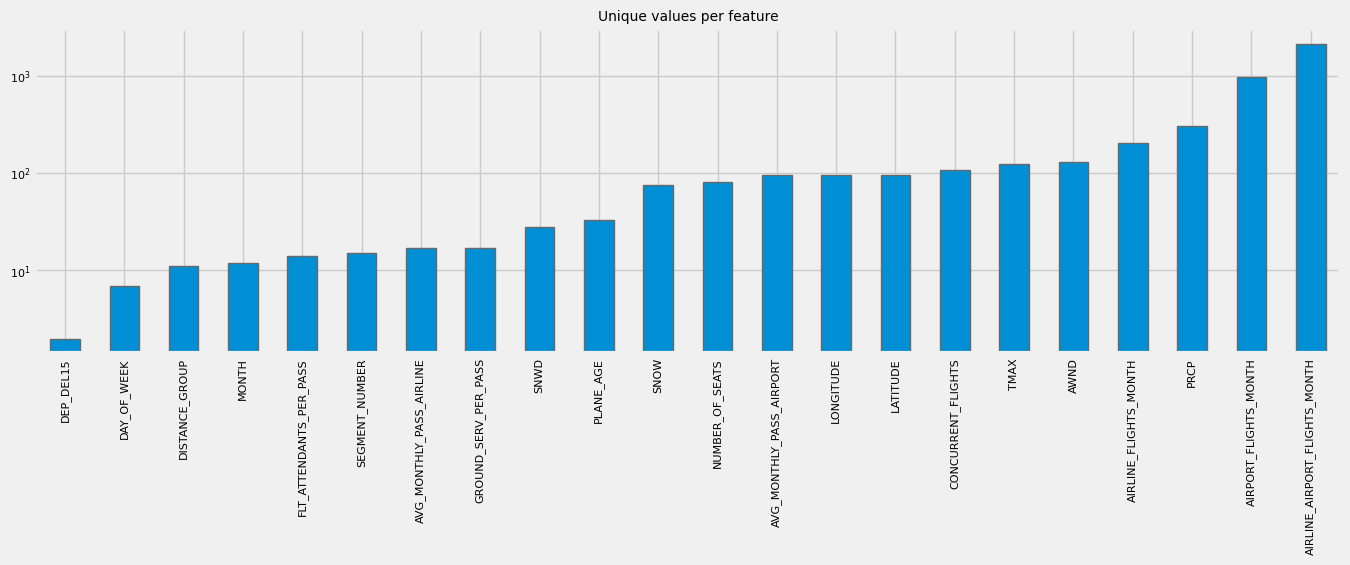

In [57]:
# For each numerical feature compute number of unique entries
unique_values = df_flights.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [12]:
# Check number of duplicates ignoring the index feature
n_duplicates = df_flights.duplicated().sum()
print(f"There seem to be {n_duplicates} duplicates in the dataset.")


There seem to be 28473 duplicates in the dataset.


In [13]:
df_flights = df_flights.drop_duplicates()
df_flights.shape

(6460589, 26)

In [14]:
#DONE till duplicates
#resume from JS Sir's advance EDA- missing value

MemoryError: Unable to allocate 173. MiB for an array with shape (6460589, 28) and data type bool

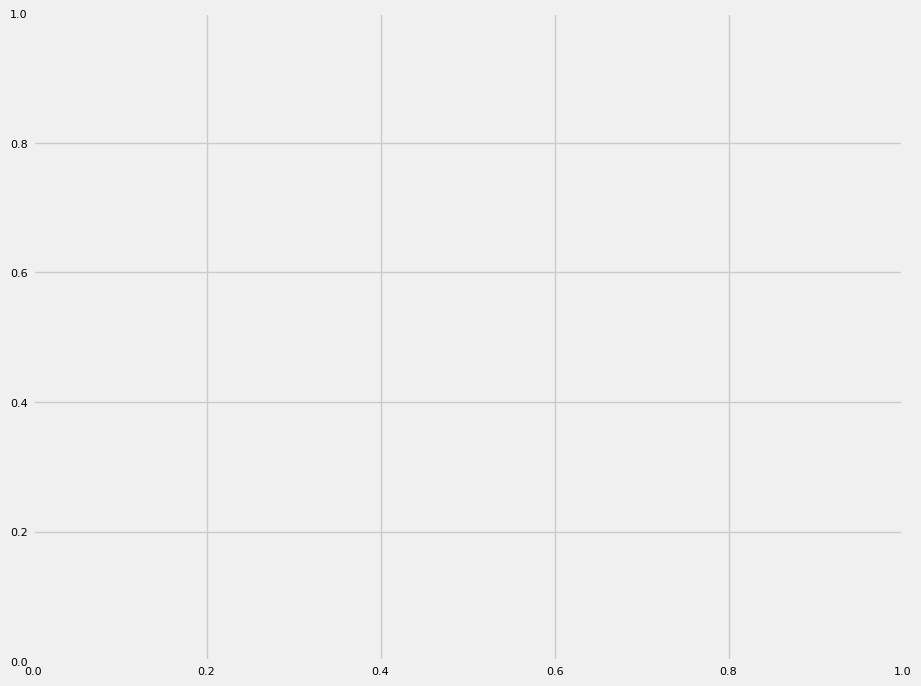

In [73]:
plt.figure(figsize=(10, 8))
plt.imshow(df_flights.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

The above figure shows on the y-axis each of the 6460589 individual samples, and on the x-axis if any of the 26 features contains a missing value. While this is a useful plot, an even better approach is to use the missingno library as follows.

In [16]:
#import missingno as msno

#msno.matrix(df_flights, labels=True, sort="descending");

ModuleNotFoundError: No module named 'missingno'

#### 2.3.1. Numerical Features
To plot the global view of the dataset for the numerical features, we use .plot() function of pandas and combine it with the following parameters:

- lw=0: lw stands for line width. 0 means that we don’t want to show any lines
- marker=".": Instead of lines, we tell the plot to use . as markers for each data point
- subplots=True: subplots tells pandas to plot each feature in a separate subplot
- layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 4 means to use 4 columns per row.
- figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.

In [ ]:
# Plots the histogram for each numerical feature in a separate subplot
df_flights.hist(bins=25, figsize=(11, 18), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

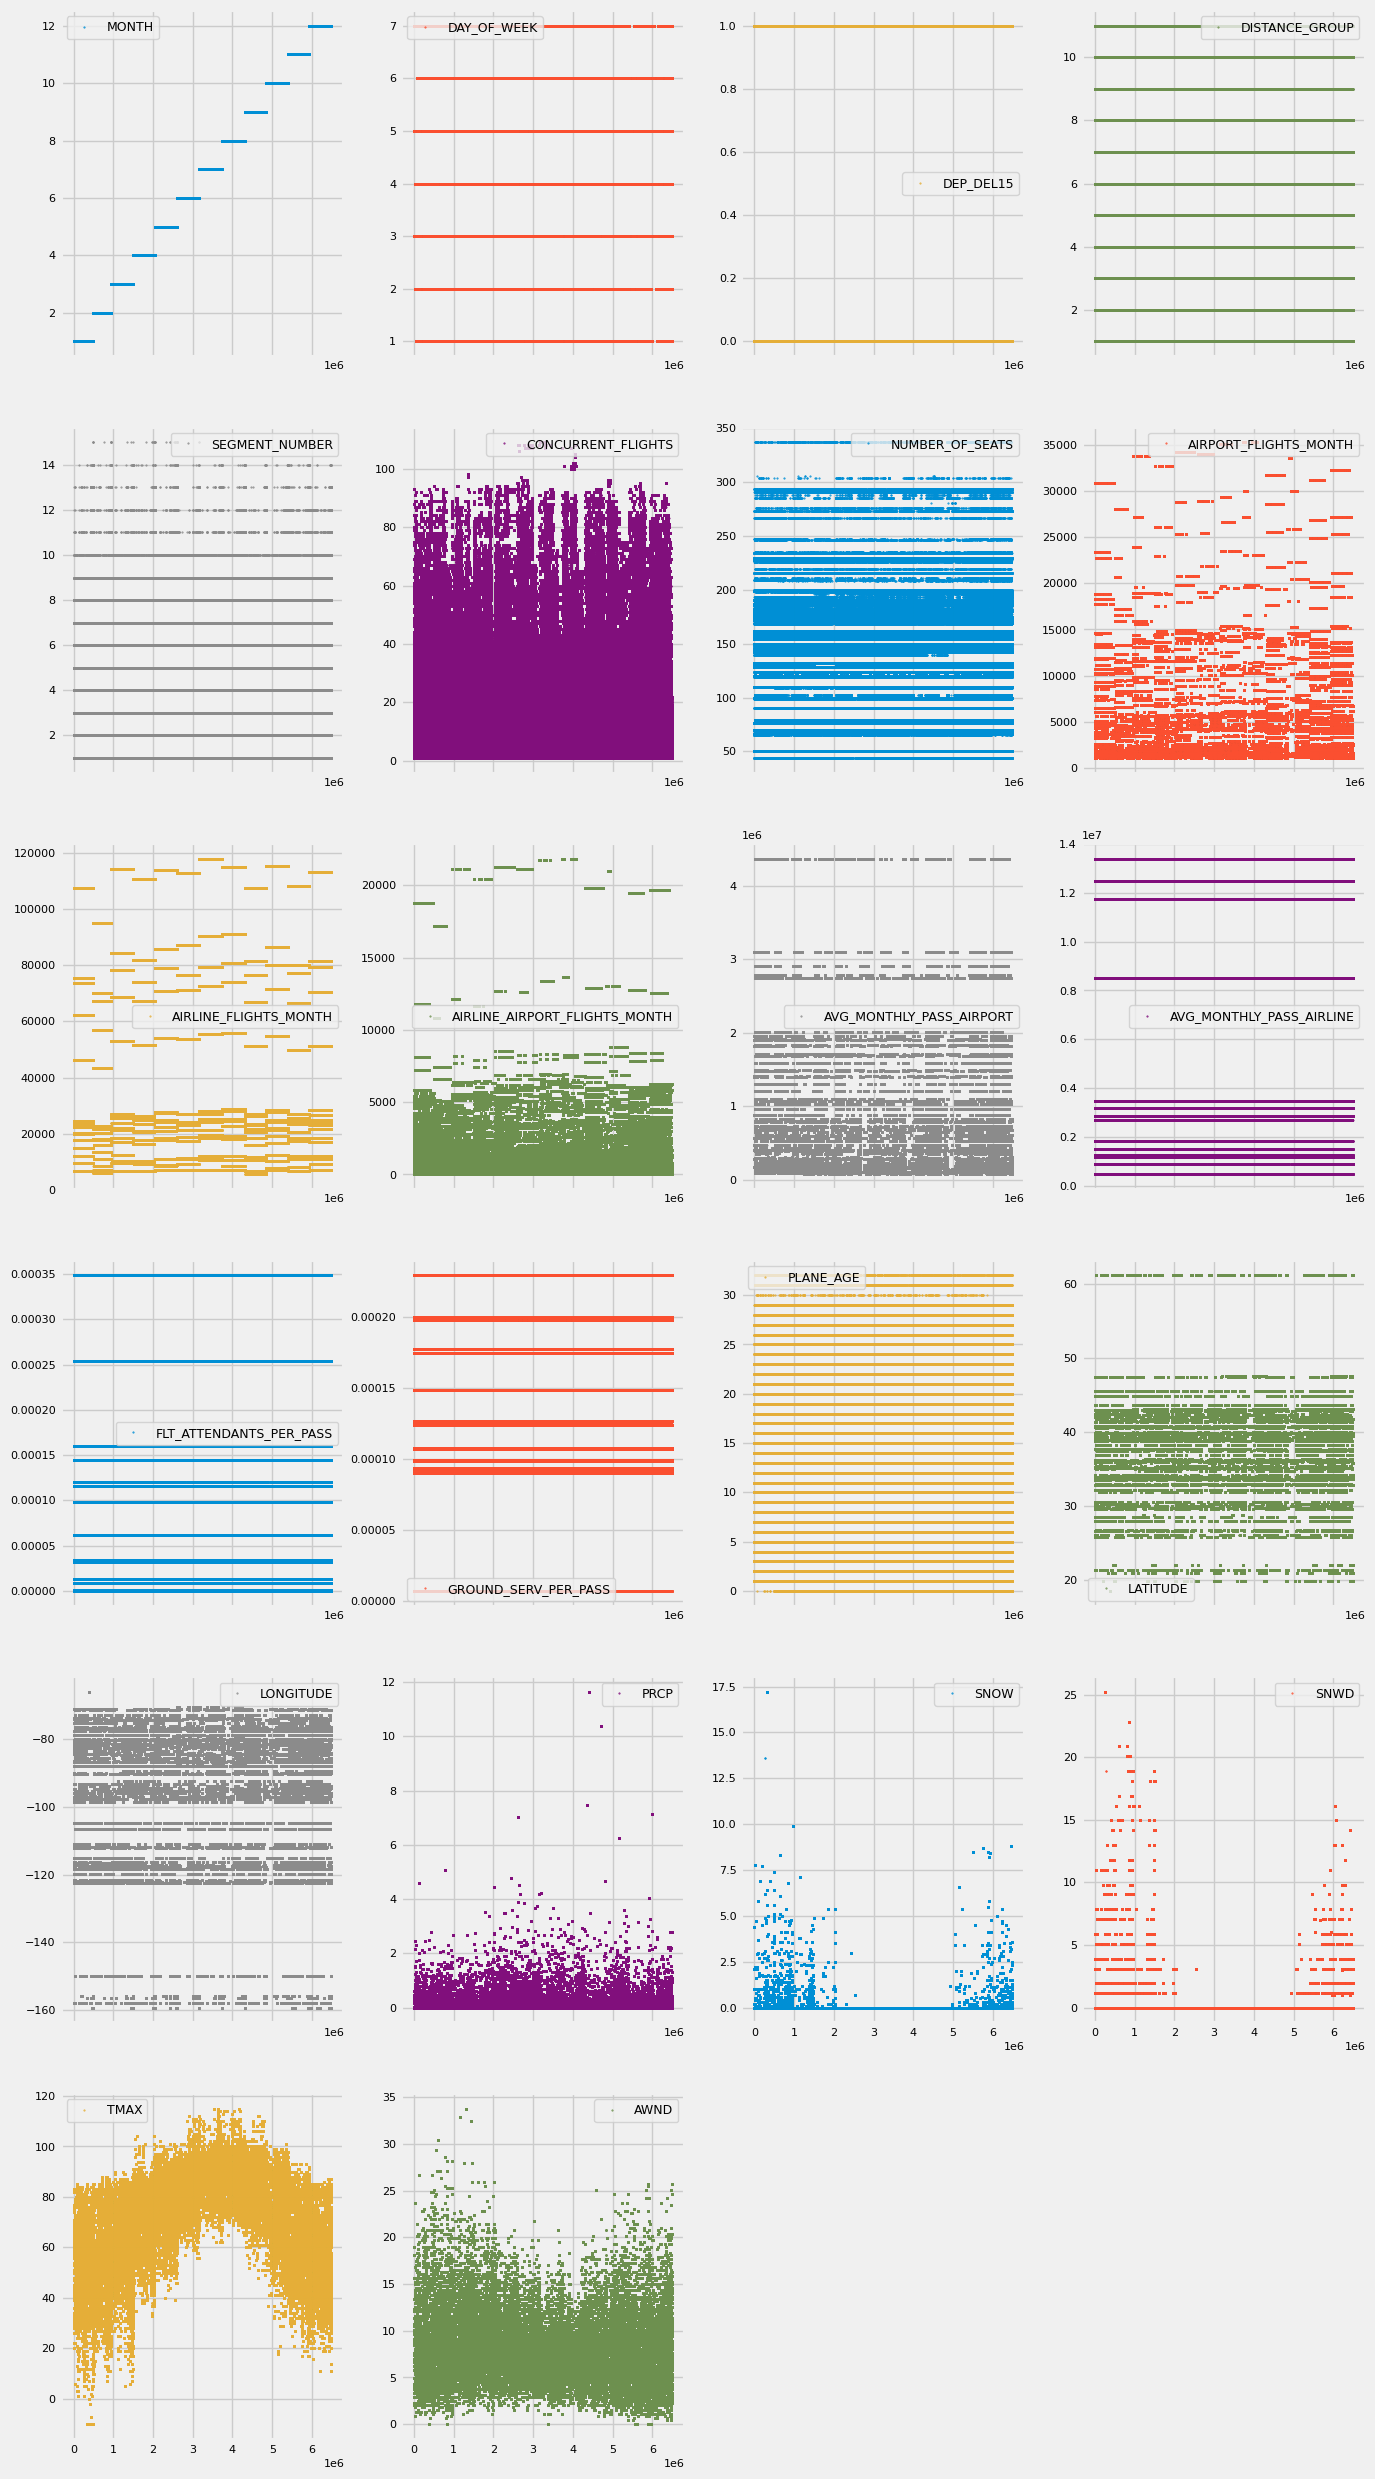

In [59]:
df_flights.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

Each point in the above figure is a sample (i.e. a row) in the dataset and each subplot represents a  feature. The y-axis shows the feature value, while the x-axis is the sample index. These kind of plots can give us a lot of ideas for data cleaning and EDA. 

#### 2.3.2. Non-numerical Features
There are multiple ways we can potentially streamline the quality investigation for each individual non-numerical features. None of them is perfect, and all of them will require some follow up investigation. But for the purpose of showcasing one such a solution, what we will do is loop through all non-numerical features and plot for each of them the number of occurrences per unique value.

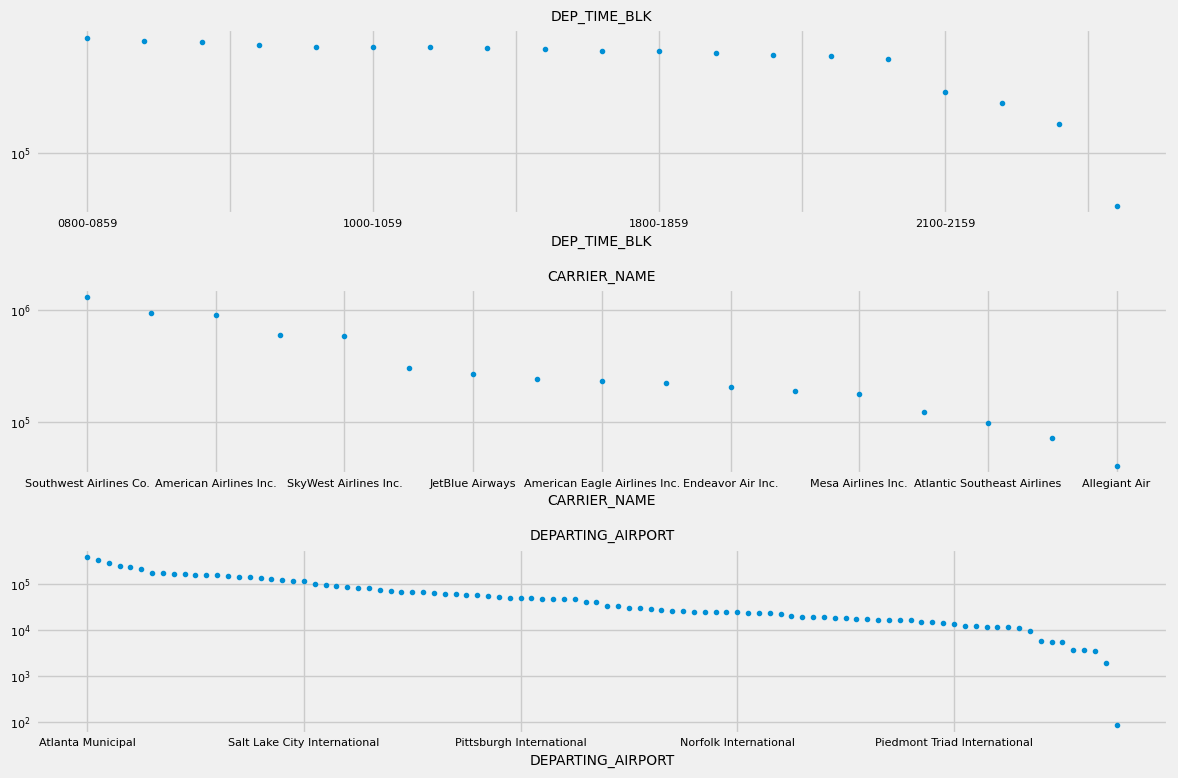

In [74]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_flights.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

### Content Investigation

Let's see the distribution in the discerete columns. We'll build a function that shows the distrubution of discerete columns in precents, by entering a column from data frame:

In [20]:
def val_cnt(col):
  print("The percentage of variables in ",end="")
  print(df_flights[col].value_counts(normalize = True) * 100)

In [21]:
# MONTH
val_cnt('MONTH')

The percentage of variables in MONTH
8     8.932266
7     8.908336
10    8.652137
5     8.601337
6     8.584558
3     8.538262
12    8.502367
4     8.223585
11    8.194578
9     8.166144
1     7.737421
2     6.959009
Name: proportion, dtype: float64


In [23]:
# DAY
val_cnt('DAY_OF_WEEK')

The percentage of variables in DAY_OF_WEEK
5    14.932911
1    14.905700
4    14.725654
2    14.588206
3    14.459038
7    14.211723
6    12.176769
Name: proportion, dtype: float64


In [26]:
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df_flights['SEASON'] = df_flights['MONTH'].map(month_to_season)
df_flights[["MONTH", "SEASON"]].sample(10)

,MONTH,SEASON
4111118,8,Summer
1539353,4,Spring
3148900,6,Summer
950934,2,Winter
2220243,5,Spring
3807412,8,Summer
477389,1,Winter
2091417,5,Spring
1604867,4,Spring
2108360,5,Spring


Created a column named season - the season is adjusted according to the month number.

In [27]:
# SEASON
val_cnt("SEASON")

The percentage of variables in SEASON
Summer    26.425160
Spring    25.363183
Fall      25.012859
Winter    23.198798
Name: proportion, dtype: float64


In [28]:
# TIME BLOCK
val_cnt("DEP_TIME_BLK")

The percentage of variables in DEP_TIME_BLK
0800-0859    6.939507
0700-0759    6.621935
0600-0659    6.528847
1700-1759    6.326606
1200-1259    6.146467
1000-1059    6.144842
0900-0959    6.113514
1100-1159    6.104335
1500-1559    6.007037
1400-1459    5.814981
1800-1859    5.799982
1600-1659    5.700347
1900-1959    5.541229
1300-1359    5.460988
2000-2059    5.291824
2100-2159    3.420013
2200-2259    2.987452
0001-0559    2.264159
2300-2359    0.785935
Name: proportion, dtype: float64


We can see here that there are less flights in the night and early morning

In [30]:
time_blocks_order = [
    'Early Morning & Late Night',  # 0001-0559
    'Morning',                     # 0600-1159
    'Afternoon',                   # 1200-1659
    'Evening',                     # 1700-1959
    'Night'                        # 2000-2359
]

df_flights['PART_OF_DAY'] = pd.cut(
    df_flights['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])),
    bins=[0, 600, 1200, 1700, 2000, 2400],
    labels=time_blocks_order,
    right=False
)

df_flights[["DEP_TIME_BLK", "PART_OF_DAY"]].sample(10)

,DEP_TIME_BLK,PART_OF_DAY
2521448,1500-1559,Afternoon
1948398,0800-0859,Morning
1276795,0700-0759,Morning
684775,1200-1259,Afternoon
3845592,2000-2059,Night
4301539,0600-0659,Morning
2849446,0700-0759,Morning
3547409,0600-0659,Morning
280460,0700-0759,Morning
721065,0800-0859,Morning


In [31]:
val_cnt('PART_OF_DAY')

The percentage of variables in PART_OF_DAY
Morning                       38.452980
Afternoon                     29.129821
Evening                       17.667816
Night                         12.485224
Early Morning & Late Night     2.264159
Name: proportion, dtype: float64


And we can see again that there are less flights when the time of day is at night, or in the early morning:

<Axes: xlabel='PART_OF_DAY', ylabel='count'>

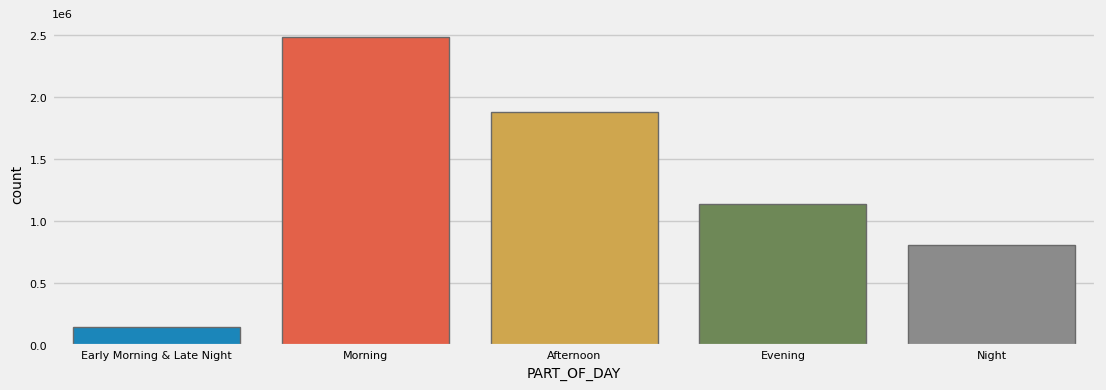

In [75]:
plt.figure(figsize=(12, 4))
sns.countplot(x = df_flights.PART_OF_DAY, hue = df_flights.PART_OF_DAY)

In [36]:
# DEPARTURE DELAY
delay_count = val_cnt('DEP_DEL15')
print(delay_count)

The percentage of variables in DEP_DEL15
0    81.017427
1    18.982573
Name: proportion, dtype: float64
None


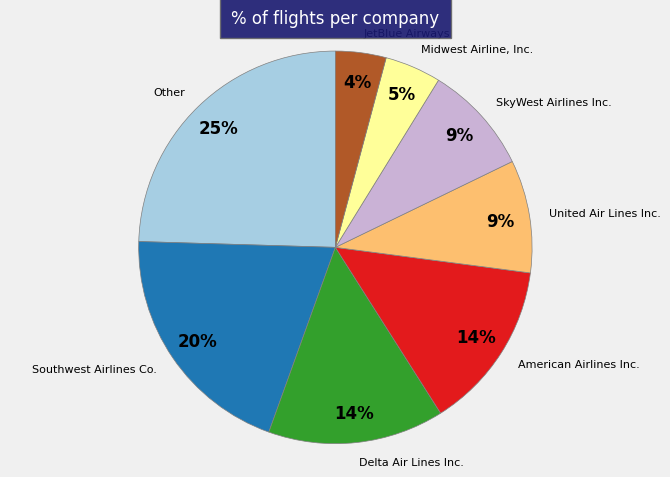


Carrier Proportions:
Other                    24.53
Southwest Airlines Co.   19.98
Delta Air Lines Inc.     14.48
American Airlines Inc.   13.93
United Air Lines Inc.     9.28
SkyWest Airlines Inc.     9.01
Midwest Airline, Inc.     4.62
JetBlue Airways           4.16
dtype: float64


In [76]:
import matplotlib.colors as mcolors

# Assuming df_flights is your DataFrame and it has a 'CARRIER_NAME' column
# If you don't have df_flights loaded, you would load it here, e.g.:
# df_flights = pd.read_csv('your_flights_data.csv')

# 1. Calculate the percentage of flights for each carrier
carrier_counts = df_flights['CARRIER_NAME'].value_counts()
total_flights = carrier_counts.sum()
carrier_proportions = (carrier_counts / total_flights) * 100

# To match the pie chart provided, we might need to select top carriers and group others as 'Other'
# Let's say we want to show carriers that represent at least 1% individually,
# and group the rest. This is an estimation based on your image.
threshold = 3.9 # Adjust this threshold based on how many individual slices you want to see
main_carriers = carrier_proportions[carrier_proportions >= threshold]
other_percentage = carrier_proportions[carrier_proportions < threshold].sum()

if other_percentage > 0:
    carrier_proportions_display = pd.concat([main_carriers, pd.Series({'Other': other_percentage})]).sort_values(ascending=False)
else:
    carrier_proportions_display = main_carriers.sort_values(ascending=False)

# Let's try to match the colors somewhat based on the image provided
# This is a manual mapping and might not be exact.
# You can define your own color palette or use a built-in one.
# For a more exact match, you'd need to extract the hex codes from the image.
# Example custom colormap or specific colors if needed:
# colors = ['#FFD700', '#FFA07A', '#EE82EE', '#7FFFD4', '#ADFF2F', '#F08080', '#87CEEB',
#           '#2E8B57', '#8B0000', '#00CED1', '#F0E68C', '#D2B48C', '#A9A9A9', '#4169E1']

# You can also use a colormap to get a variety of colors
num_colors = len(carrier_proportions_display)
# Using a common colormap and creating a list of colors from it
cmap = plt.cm.get_cmap('Paired', num_colors) # 'Paired', 'Set3', 'tab20' are good options for distinct colors
colors = [cmap(i) for i in range(num_colors)]


# 2. Generate the pie chart
plt.figure(figsize=(7, 5))
wedges, texts, autotexts = plt.pie(carrier_proportions_display,
                                   labels=carrier_proportions_display.index,
                                   autopct='%1.0f%%',  # Format percentages to 0 decimal places
                                   startangle=90,
                                   pctdistance=0.85, # Distance of the percentage labels from the center
                                   colors=colors,
                                   wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5}) # Add a border to slices

# Adjust font size and color for labels and percentages to make them visible
for text in texts:
    text.set_fontsize(8)
    text.set_color('black') # You can change this if needed

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black') # Set percentage text color to black
    autotext.set_fontweight('bold')

plt.title('% of flights per company', fontsize=12, color='white',
          bbox=dict(facecolor='midnightblue', alpha=0.9, pad=8))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# If you want to see the carrier proportions in a table format:
print("\nCarrier Proportions:")
print(carrier_proportions_display)

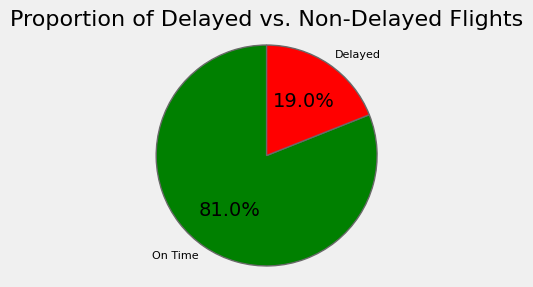

In [77]:
plt.figure(figsize=(3, 3))
plt.pie(df_flights['DEP_DEL15'].value_counts(), labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

plt.title('Proportion of Delayed vs. Non-Delayed Flights', fontsize=16)
plt.axis('equal')

plt.show()

As we can see here, the distribution in our target variable is about 81% in class 0 (false), and 19% in class 1 (true), when there are 4 times more examples of flights who has no delay in them. It suits the 2019 report about delayed flights from Stacker (https://stacker.com/travel/major-airports-longest-departure-delays), which shows the precentage of delayed departured flights is 19.5% in 2019, in the US.

airports = df_flights[['LONGITUDE', 'LATITUDE', 'DEPARTING_AIRPORT']]

count_flights = df_flights["DEPARTING_AIRPORT"].value_counts()

plt.figure(figsize=(11, 11))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple']
size_limits = [1, 100, 1000, 10000, 100000]
labels = []

# Generate labels for legend
for i in range(len(size_limits) - 1):
    label = f"{size_limits[i]} <.< {size_limits[i+1]}"
    labels.append(label)

# Add map features
ax.add_feature(NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgray'))
ax.coastlines()
ax.add_feature(STATES, edgecolor='gray')
ax.set_extent([-180, -50, 10, 75])

# Plot airports on map
for index, row in airports.iterrows():
    flight_count = count_flights[row['DEPARTING_AIRPORT']]
    isize = []
    for i, val in enumerate(size_limits):
        if val < flight_count:
            isize.append(i)
    ind = isize[-1] if isize else 0  # default to smallest if no flights
    ax.plot(row['LONGITUDE'], row['LATITUDE'], marker='o', markersize=ind + 5, color=colors[ind],markeredgewidth=1, markeredgecolor='k', transform=ccrs.Geodetic(), label=labels[ind])

# Remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = [f"{size_limits[i]} <.< {size_limits[i+1]}" for i in range(len(size_limits) - 1)]
new_label = OrderedDict((key, by_label[key]) for key in key_order if key in by_label)
plt.title("Departing Airports - Geographical Places & Amount of Flights")
plt.legend(new_label.values(), new_label.keys(), loc='upper left', prop={'size': 11},
           title='Number of flights depart from airport', frameon=True, framealpha=1)

plt.show()

The error NameError: name 'ccrs' is not defined means that the module cartopy.crs (abbreviated as ccrs) is not imported in your notebook.

To fix this, add the following import statements at the top of your notebook:

python
Copy
Edit
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, STATES
from collections import OrderedDict
Also, make sure Cartopy is installed:

✅ If you're using conda (recommended):
bash
Copy
Edit
conda install -c conda-forge cartopy
Or if you're using pip (less stable):
bash
Copy
Edit
pip install cartopy
Once you import the required modules, your line:

python
Copy
Edit
ax = plt.axes(projection=ccrs.PlateCarree())
will work correctly.

Let me know if you face any additional errors (like PROJ or shapefile errors—Cartopy has a few quirks with that).









Ask ChatGPT


In [43]:
pd.pivot_table(df_flights, index = 'DEP_DEL15', values = 'SNOW', columns = 'SEASON', aggfunc = 'mean')

SEASON,Fall,Spring,Summer,Winter
DEP_DEL15,,,,
0,0.01406,0.020577,0.0,0.065539
1,0.06733,0.050861,0.0,0.157219


Rows: Departue delay (True/False)

Columns: Seasons (בדיד)

Calculated values: Snow amount

Mainly in winter, there more snow amount for delayed flights compared to non-delayed flights. It occurs on fall ans spring, and on summer there is no snow.

In [44]:
df_flights.groupby('DEP_DEL15').agg({'AWND': 'mean', 'PRCP': 'mean', 'SNOW': 'mean', 'SNWD': 'mean', 'TMAX': 'mean'})

,AWND,PRCP,SNOW,SNWD,TMAX
DEP_DEL15,,,,,
0,8.252683,0.090442,0.023930,0.082429,71.544496
1,8.721610,0.160630,0.064455,0.130881,71.128258


Rows: Departure delay (True/False)

Columns: Weather parameters.

We can see that on average, the true departue delay row has slightly stronger wind, more precepration, snow and snow on ground, and the max temparture is lower.

Important to notice that the 75% (third block) of PRCP, SNOW and SNOW is 0 in the describe function, which means that most of data in these columns is 0, that's why the diffreneces are small and numbers aren't big.

In [45]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_flights.groupby('DEP_DEL15').agg({'CONCURRENT_FLIGHTS' : 'mean', 'NUMBER_OF_SEATS': 'mean', 'AIRPORT_FLIGHTS_MONTH' : 'mean', 'AIRLINE_FLIGHTS_MONTH' : 'mean', 'AVG_MONTHLY_PASS_AIRPORT' : 'mean', 'AVG_MONTHLY_PASS_AIRLINE' : 'mean'})

,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE
DEP_DEL15,,,,,,
0,27.75,133.47,12575.67,62952.37,1575960.45,7818546.94
1,28.23,134.88,13171.57,63221.12,1645056.70,7829133.02


Rows: Departure Delay (True/False - binary)

Columns: Airport, Airline and Flight statistics

Delayed flights have slightly higher averages for concurrent flights, number of seats, airline flights month. As well as more significant difference at airport flights month, average monthly passengers at both the airport and the airline compared to non-delayed flights.

# Continuous features
Now that we have a way to select the continuous features, let’s use seaborn’s pairplot to visualize the relationships between these features. Important to note, seaborn’s pairplot routine can take a long time to create all subplots. Therefore it is recommended not use it when the number of features in the data is very high.

let’s simplify our option by deciding that we treat features with less than 35 unique features as discrete or ordinal features, and the other features as continuous features.

In [63]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_flights.select_dtypes(include="number").nunique() >= 35

In [64]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_flights[cols_continuous[cols_continuous].index]
df_continuous.shape

(6460589, 12)

MemoryError: Unable to allocate 49.3 MiB for an array with shape (6460589,) and data type int64

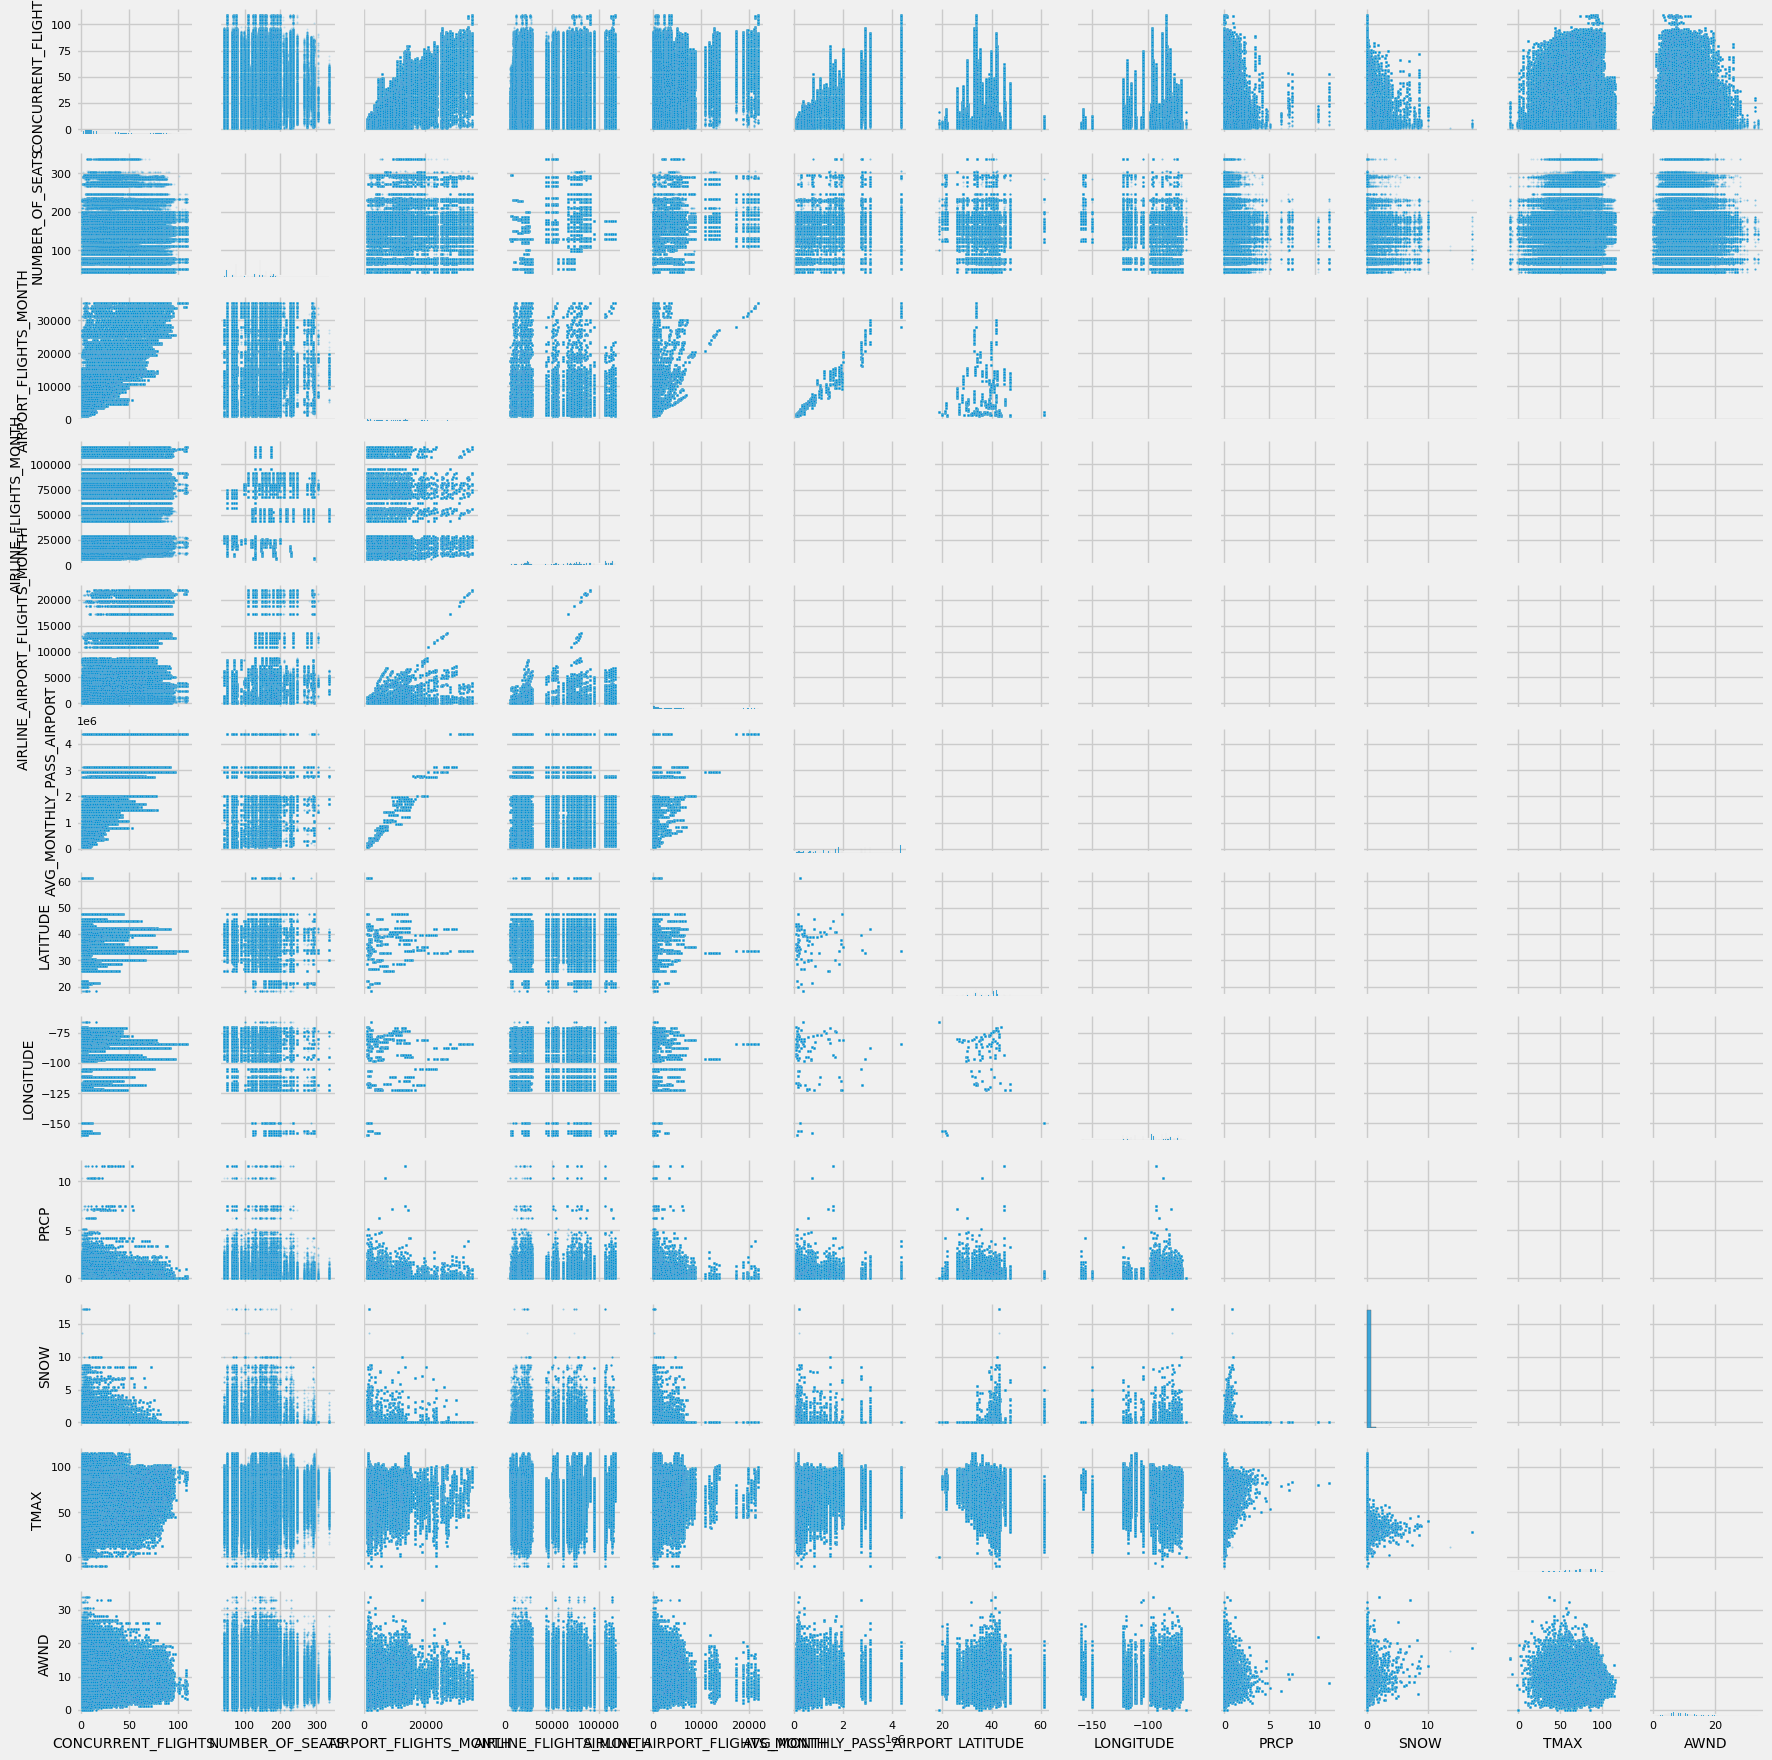

In [65]:
#sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

####  Discrete and Ordinal Features
Finding patterns in the discrete or ordinal features is a bit more tricky. But also here, some quick pandas and seaborn tricks can help us to get a general overview of our dataset. First, let’s select the columns we want to investigate. 

There are multiple ways in which we can investigate all of these features. Let’s try one example, using seaborn’s stripplot() together with a handy zip() for-loop for subplots.

Note, to spread the values out in the direction of the y-axis we need to chose one particular (hopefully informative) feature. While the ‘right’ feature can help to identify some interesting patterns, usually any continuous feature should do the trick. The main interest in this kind of plot is to see how many samples each discrete value contains.

In [ ]:
# Create a new dataframe which doesn't contain the numerical continuous features
#df_discrete = df_flights[cols_continuous[~cols_continuous].index]
#df_discrete.shape

In [ ]:
# Establish number of columns and rows needed to plot all features
#n_cols = 5
#n_elements = len(df_discrete.columns)
#n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
#y_value = df_flights["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
#fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
#for col, ax in zip(df_discrete.columns, axes.ravel()):
#    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
#plt.tight_layout();

### 3.3. Feature relationships
Let’s take a look at relationships between features. More precisely how they correlate. The quickest way to do so is to use .corr() function of the pandas. We compute the feature correlation matrix for all numerical features.

In [69]:
# Computes feature correlation
df_corr = df_continuous.corr(method="pearson")

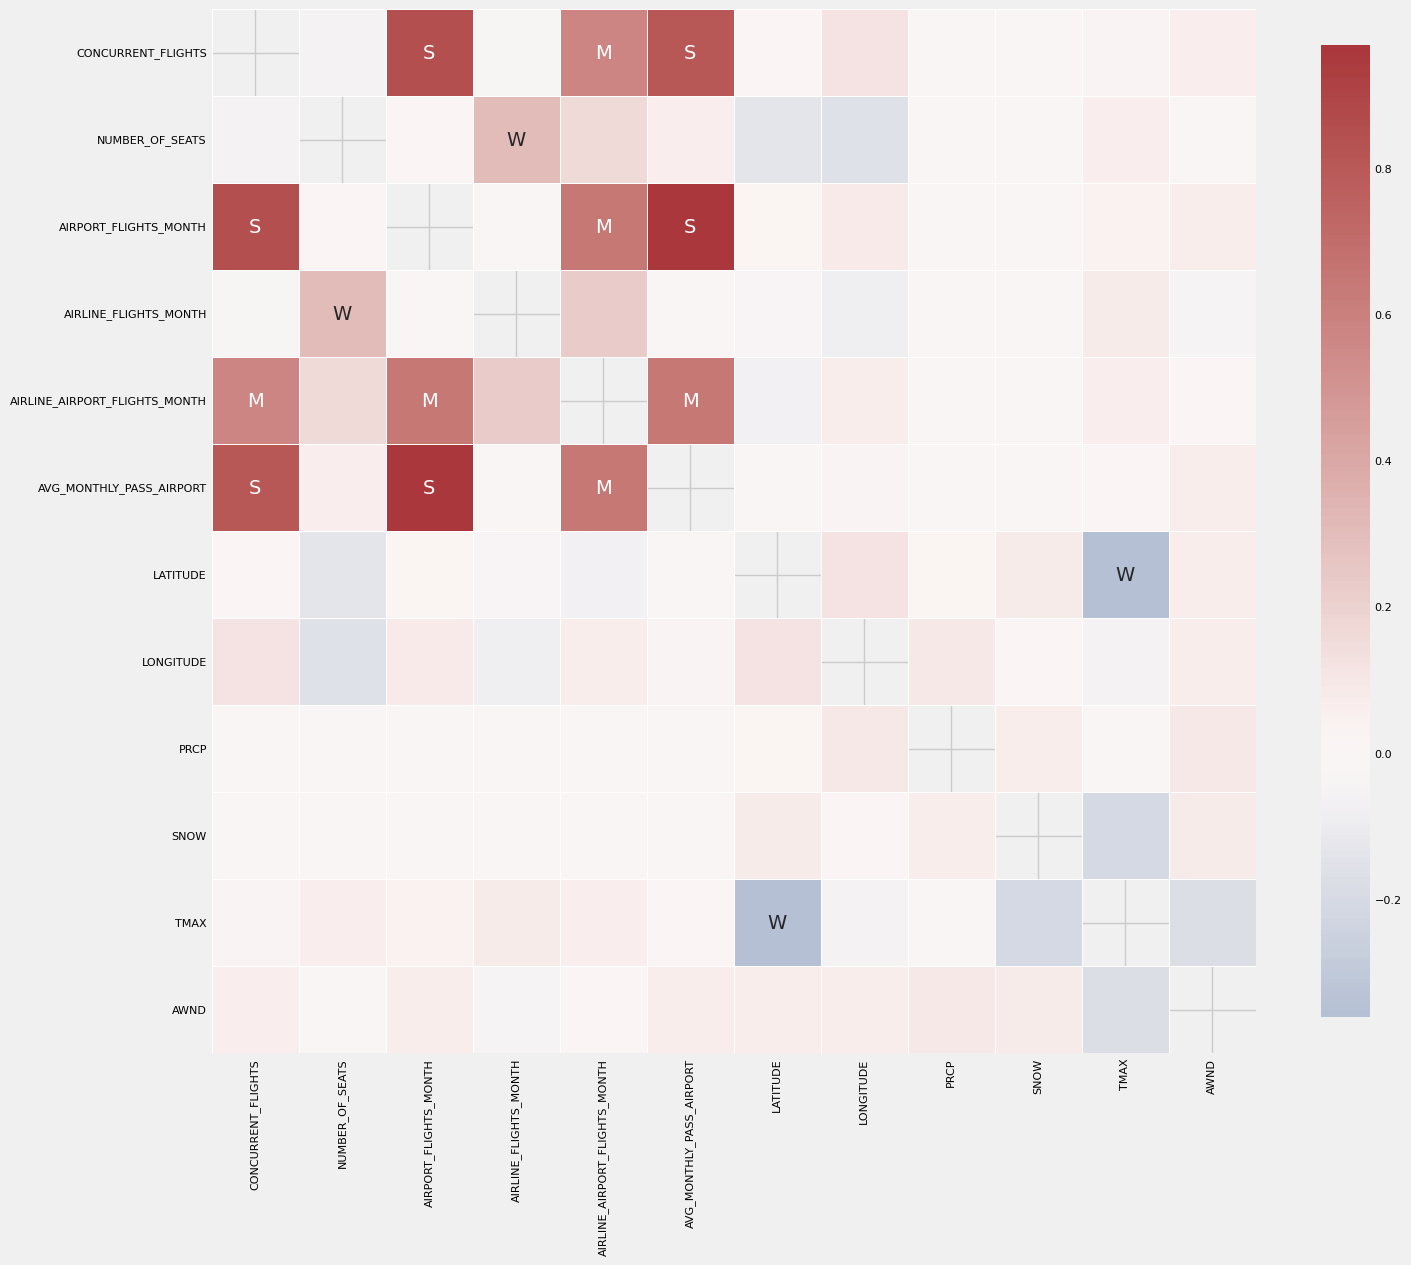

In [70]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

We can actually sort (i.e., order) the correlation values as follows: 

In [71]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

TMAX                           LATITUDE                        -0.36
                               SNOW                            -0.21
AWND                           TMAX                            -0.17
LONGITUDE                      NUMBER_OF_SEATS                 -0.16
LATITUDE                       NUMBER_OF_SEATS                 -0.14
                                                                ... 
AVG_MONTHLY_PASS_AIRPORT       AIRLINE_AIRPORT_FLIGHTS_MONTH    0.64
AIRLINE_AIRPORT_FLIGHTS_MONTH  AIRPORT_FLIGHTS_MONTH            0.65
AVG_MONTHLY_PASS_AIRPORT       CONCURRENT_FLIGHTS               0.81
AIRPORT_FLIGHTS_MONTH          CONCURRENT_FLIGHTS               0.85
AVG_MONTHLY_PASS_AIRPORT       AIRPORT_FLIGHTS_MONTH            0.97
Length: 66, dtype: float64

### Exploratory Analysis - Seaborn

During the graphs, the green color will be flights that have arrived on time, and red is delayed flights, exactly like the boards in the airport.

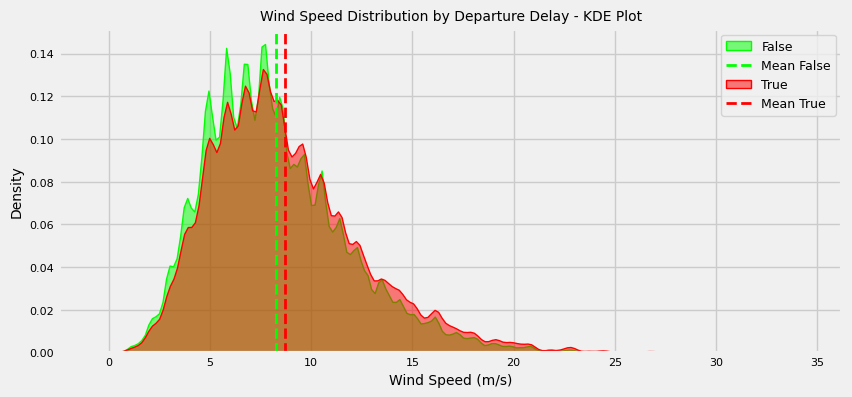

In [78]:
data_class0 = df_flights[df_flights['DEP_DEL15'] == 0]['AWND']
data_class1 = df_flights[df_flights['DEP_DEL15'] == 1]['AWND']
plt.figure(figsize=(9, 4))

sns.kdeplot(data_class0, color='lime', label='False', alpha=0.5, fill = True)
plt.axvline(data_class0.mean(), color='lime', linestyle='--', linewidth=2, label='Mean False')
sns.kdeplot(data_class1, color='red', label='True', alpha=0.5, fill = True)
plt.axvline(data_class1.mean(), color='red', linestyle='--', linewidth=2, label='Mean True')


plt.legend()
plt.title('Wind Speed Distribution by Departure Delay - KDE Plot')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.show()

Graph - KDE plot

X axis - Max wind speed (continuous)

Y axis - Density

Hue - Departure Delay (True/False - binary)

We can notice that aproximately after the wind speed reaches the mean of non delay and it gets stronger - the density of flights who have delay is higher

<Axes: title={'center': 'Snow Box Plot'}, xlabel='Snow (Inches)'>

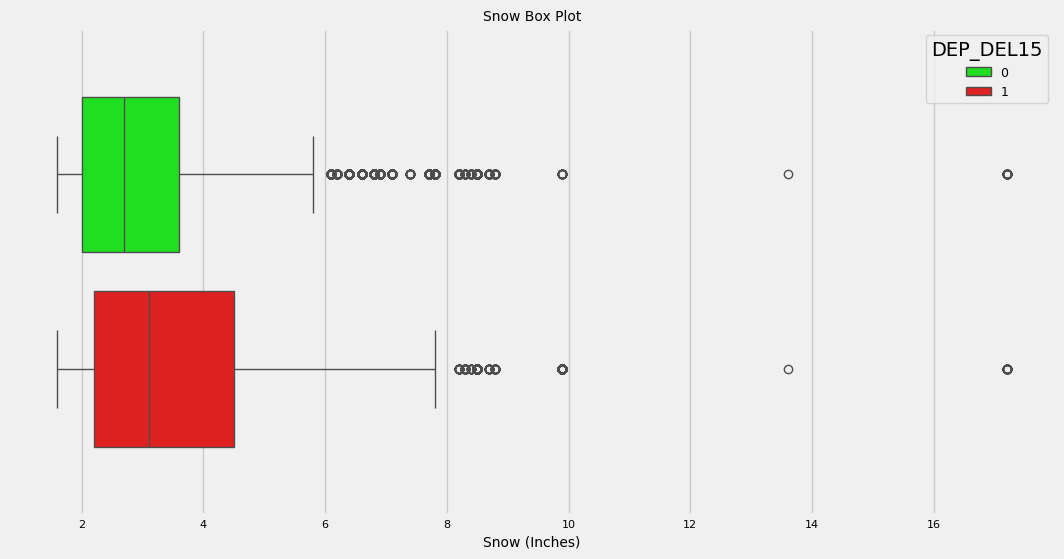

In [79]:
plt.figure(figsize=(12, 6))
plt.title("Snow Box Plot")
plt.xlabel("Snow (Inches)")
sns.boxplot(data=df_flights[df_flights["SNOW"] > 1.5], x="SNOW", hue="DEP_DEL15", gap = .2, palette={0: 'lime', 1: 'red'})

Graph - Box Plot

X axis - Snow Amount (continuous). Amount of snow in this graph is above 1.5 inches, in order to show the impact of higher snow rates on delay, and less by focusing on most values of snow, which is 0 (we saw in describe function).

Hue - Departure Delay (True/False - binary)

We can notice that there is a wider spread of snow amounts for delayed flights compared to non-delayed flights. This suggests that there may be a relationship between the amount of snow and whether or not a flight is delayed, with flights experiencing more snow being more likely to be delayed.

<Axes: title={'center': 'Snow Depth on Ground -  Bar Plot'}, xlabel='SEASON', ylabel='Snow Depth on Ground (Inches)'>

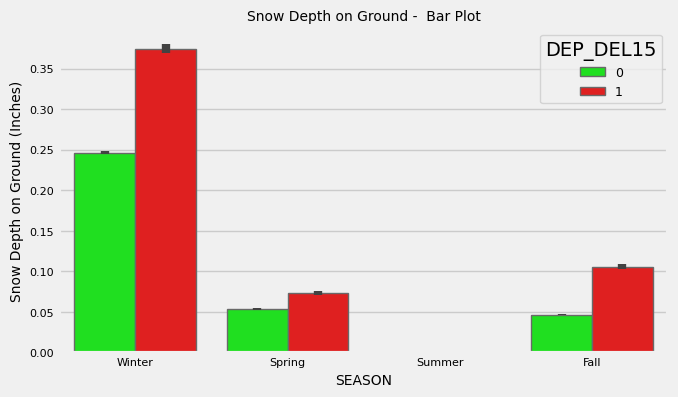

In [80]:
plt.figure(figsize=(7, 4))
plt.title("Snow Depth on Ground -  Bar Plot")
plt.ylabel("Snow Depth on Ground (Inches)")
sns.barplot(y = df_flights.SNWD, x = df_flights.SEASON, hue = df_flights.DEP_DEL15, palette={0: 'lime', 1: 'red'})

Graph - Bar Plot

X axis - Season (discrete)

Y axis - Snow Depth on Ground (continuous)

Hue - Departure Delay (True/False - binary)

We can notice 2 things here:

During summer there is no snow on ground, and during winter there is more snow on ground
Mainly in the winter, when there is more snow on ground, flights who had delay, appeared to have more snow on ground on average. Also in Fall and Spring.

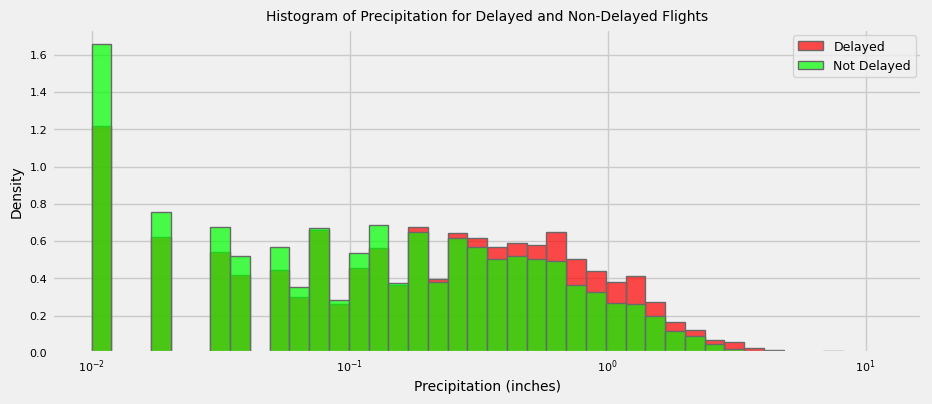

In [81]:
plt.figure(figsize=(10, 4))
df_delayed = df_flights[df_flights['DEP_DEL15'] == 1]
df_not_delayed = df_flights[df_flights['DEP_DEL15'] == 0]
sns.histplot(df_delayed['PRCP'], color='red', label='Delayed', stat="density", bins=40, alpha=0.7, log_scale = True)
sns.histplot(df_not_delayed['PRCP'], color='lime', label='Not Delayed', stat="density", bins=40, alpha=0.7, log_scale = True)
plt.title('Histogram of Precipitation for Delayed and Non-Delayed Flights')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Density')
plt.legend()
plt.show()

Graph - Histogram (Hist plot)

X axis - Precepitation (continuous)

Y axis - Density

Hue - Departure Delay (True/False - binary)

We can notice that when the precipitation get higher, the frequency of flights with delay is higher as well.

In [ ]:
plt.figure(figsize=(9, 4))
plt.title("Max Tempartue -  Violin Plot")
plt.xlabel("Max Temparture (F)")
sns.violinplot(data = df_flights, x="TMAX", hue="DEP_DEL15", split = True, palette={0: 'lime', 1: 'red'})

Graph - Violin Plot

X axis - Max Temparture (continuous)

Hue - Departure Delay (True/False - binary)

We can learn from the graph that there is no significant affect of the max temparture on the delay, the halves of the plot by the hue look simillar.

In [ ]:
plt.figure(figsize=(9, 5))
plt.title("Max Tempartue Across Months - Line Plot")
plt.xlabel("Month")
plt.ylabel("Max Temparture (F)")
sns.lineplot(x = df_flights.MONTH, y = df_flights.TMAX, hue = df_flights.DEP_DEL15, palette={0: 'lime', 1: 'red'}, style=df_flights.DEP_DEL15, markers=True, dashes=False, linewidth = 3)

Graph - Line Plot

X axis - Month (discrete)

Y axis - Max Temparture (continuous)

Hue - Departure Delay (True/False - binary)

We can conclude several things from this graph:

In the summer months, the max temparture is way higher than the other months, and in winter is lower.
The max temparture in each month matches both delay and non delays flights (especially in summer months) - the curves look alike, which indicates that max tempartue doesn't affect much the probability of having a delay. In spite of that, in winter months, the avergae max tempartue of delay class is lower, and in winter months there are bad weather conditions.
The tempartue by itself doesn't affect the delay, but id does affect other weather parameters which cause delay.

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(y = df_flights.CONCURRENT_FLIGHTS, x = df_flights.AIRPORT_FLIGHTS_MONTH, hue = df_flights.DEP_DEL15, s = 60, palette={0: 'green', 1: 'red'})
plt.title('Concurrent Flights vs. Airport Flights Month - Scatter Plot')
plt.xlabel('Airport Flights Month')
plt.ylabel('Concurrent Flights')
plt.legend(title='Delay Status')
plt.show()

Graph - Scatter Plot

X axis - Average Airport Flights per Month (continuous).

Y axis - Amount of flights departing from the airport in the same time block (continuous)

Hue - Departure Delay (True/False - binary)

This graph describes the load and traffic of flights, we can learn several insights:

The graph shows that as the number of flights at an airport increases, so does the number of concurrent flights
the load of airport doesn't impact delays (red dots) much.

In [ ]:
plt.figure(figsize=(9, 4))
plt.title("Segment Number Across Distance Groups - Bar Plot")
plt.xlabel("Distance Group")
plt.ylabel("Segment Number")
sns.barplot(x = df_flights.DISTANCE_GROUP, y = df_flights.SEGMENT_NUMBER, hue = df_flights.DEP_DEL15, palette={0: 'lime', 1: 'red'})

Graph - Bar Plot

X axis - Distance Group (discrete)

Y axis - Amount of segments an aircraft had on the same day before current flight (continuous)

Hue - Departure Delay (True/False - binary)

We can insight several items:

The graph shows that as the distance group increases, the segment number decreases - an aircraft can't manage to have several flights if it has a longer flight before the current one.
Delayed flights consistently have higher segment numbers than non-delayed flights within the same distance group. This suggests that flights with more segments per day are more prone to delays, especially for shorter distances.

In [ ]:
heatmap_data = pd.pivot_table(
    df_flights,
    values='DEP_DEL15',
    index='PART_OF_DAY',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)

# Define the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom', ['limegreen', 'yellow', 'red'])

# Plotting the heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=.5)

# Adding titles and labels
plt.title('Heatmap of Avg. Delay Rate by Time Part of Day and Day of Week', fontsize=12)
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Time Part', fontsize=10)
plt.yticks(rotation=25)
plt.show()

Graph - Heatmap

X axis - Day of Week (discrete)

Y axis - Part Time of Day (discrete)

Values - Mean of Departure Delay, by the x and y axes.

As we can see in this graph, the part of the day highly affect the propabilty of having a delay. When the the day begins, until morning, there are less chances of delay (color is brighter). Later that day, there are more chances of having a delay (color is darker). In addition, the day of week column doesn't affect much the delay, we can notice that the color of each cell in a row are pretty similar, the columns are pretty simillar too, what most determines impact on the delay here is the part of day.

In [72]:
df_flights.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,SEASON,PART_OF_DAY
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.00,0.00,8,McCarran International,36.08,-115.15,NONE,0.00,0.00,0.00,65.00,2.91,Winter,Morning
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.00,0.00,3,McCarran International,36.08,-115.15,NONE,0.00,0.00,0.00,65.00,2.91,Winter,Morning
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.00,0.00,18,McCarran International,36.08,-115.15,NONE,0.00,0.00,0.00,65.00,2.91,Winter,Morning
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.00,0.00,2,McCarran International,36.08,-115.15,NONE,0.00,0.00,0.00,65.00,2.91,Winter,Morning
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.00,0.00,1,McCarran International,36.08,-115.15,NONE,0.00,0.00,0.00,65.00,2.91,Winter,Early Morning & Late Night
